# Skills challenge \#2
Below are a series of questions. Use the loaded data to answer the questions. You will almost certainly need to import more packages (`pandas`, `numpy`, etc.) to complete these. You are welcome to use any source except for your classmates. So Google away!

You will be graded on both the **correctness** and **cleanliness** of your work. So don't submit poorly written code or your grade will reflect that. Use Markdown describing what you have done. If you get stuck, move on to another part. Most questions don't rely on the answer to earlier questions.

### Imports

In [80]:
import pandas as pd
from matplotlib import pyplot as plt

### Data loading

In [5]:
df = pd.read_csv('../../data/free_throws.csv')

In [6]:
df.head()

,Unnamed: 0,game_id,period,player,playoffs,shot_made,home_team,visit_team,home_score,visit_score,home_final_score,visit_final_score,minutes,season_start,shot_count
0,0,261031013,1,Andrew Bynum,0,1,LAL,PHX,1,0,114,106,11.750000,2006,1
1,1,261031013,1,Andrew Bynum,0,1,LAL,PHX,2,0,114,106,11.750000,2006,2
2,2,261031013,1,Andrew Bynum,0,1,LAL,PHX,12,18,114,106,7.433333,2006,1
3,3,261031013,1,Andrew Bynum,0,0,LAL,PHX,12,18,114,106,7.433333,2006,2
4,4,261031013,1,Shawn Marion,0,1,LAL,PHX,12,21,114,106,7.300000,2006,1


### Data description

This data is all the free throws taken in the NBA between 2006 and 2016. The columns that we are interested are:
- **game_id**: The unique ID for each game. The number itself doesn't mean anything, but if two rows have the same game_id, then that means they occurred in the same game.
- **period**: Which period the free throw occurred in (there are four periods in basketball).
- **player**: The player's name
- **playoffs**: 0 = not in playoffs, 1 = in playoffs
- **shot_made**: 0 = shot not made, 1 = shot made
- **home_team**: Abbreviated name of the home team (the team whose city the game was played in)
- **visit_team**: Abbreviated name of the visiting team
- **home_score**: The home team's score in the game when the free throw was taken
- **visit_score**: The visiting team's score in the game when the free throw was taken
- **final_score**: The final score in the game
- **minutes**: How many minutes into the game when the free throw was taken. An NBA game is 48 minutes long (not counting a potential overtime).
- **season_start**: What year the season started in (seasons start in one year and finish the following year)
- **shot_count**: Some times a player is awarded more than one free throw. A 1 indicates this is their first shot, a 2 indicates this is their second. They can get a maximum of 3 shots.

## Tasks

### Data cleaning
**DC1:** Drop the column "Unnamed: 0". Save this back as the variable `df`.

In [7]:
df = df.drop('Unnamed: 0', axis='columns')

**DC2:** For each column, print how many `None` or `NaN` values are in the column, along with what percentage of the rows are missing. Round the percentage to two decimal places. Your output should look like:

```
col1_name: 20 (0.05%) missing values 
col2_name: 150 (1.56%) missing values 
```

In [8]:
for c in df.columns:
    n_missing = df[c].isna().sum()
    pct_missing = n_missing / df.shape[0]
    print(f'{c}: {n_missing} ({100*pct_missing:.2f})% missing values')

game_id: 0 (0.00)% missing values
period: 0 (0.00)% missing values
player: 0 (0.00)% missing values
playoffs: 0 (0.00)% missing values
shot_made: 0 (0.00)% missing values
home_team: 0 (0.00)% missing values
visit_team: 0 (0.00)% missing values
home_score: 0 (0.00)% missing values
visit_score: 0 (0.00)% missing values
home_final_score: 0 (0.00)% missing values
visit_final_score: 0 (0.00)% missing values
minutes: 0 (0.00)% missing values
season_start: 0 (0.00)% missing values
shot_count: 0 (0.00)% missing values


### Data exporation


**DE1:** Show the top 5 players in terms of number of free throws *taken* (total number of rows, regardless of make or miss) throughout the season. That is, your output should look like:
```
John Smith: 1954
Elliot Whistlebee: 1859
...
```
Your output *does not* have to look exactly like mine. Just show the players and their number of free throws.

In [18]:
# Use value_counts to see how many times each player shows up
df['player'].value_counts()[:5]

LeBron James     8001
Dwight Howard    7728
Kevin Durant     6030
Kobe Bryant      5594
Dwyane Wade      5594
Name: player, dtype: int64

**DE2:** Do the same but for the highest number of free throws *made*.

In [19]:
# First we need to filter out free throw misses. So we only want rows where shot_made == 1
made_df = df[df['shot_made'] == 1]

# Now use value_counts like just above
made_df['player'].value_counts()[:5]

LeBron James       5957
Kevin Durant       5293
Kobe Bryant        4702
Carmelo Anthony    4360
Dwight Howard      4302
Name: player, dtype: int64

**DE3:** Make a Pandas Series which contains the players and how many shots they *took*.

In [73]:
# If you don't see why we selected the column 'player', try removing that part and looking at player_shots_took.
player_shots_took = df.groupby('player')['player'].count()

**DE4:** Make a Pandas Series which contains the players and how many shots they *made*.

In [74]:
player_shots_made = df.groupby('player')['shot_made'].sum()

### Plotting
**P1:** Make a histogram (`my_data.plot(..., kind='hist')`) with 50 bins of the number of free throws taken. Give the graph a nice title, and label the x and y axes. Make the figsize 12 by 8 and include a grid.

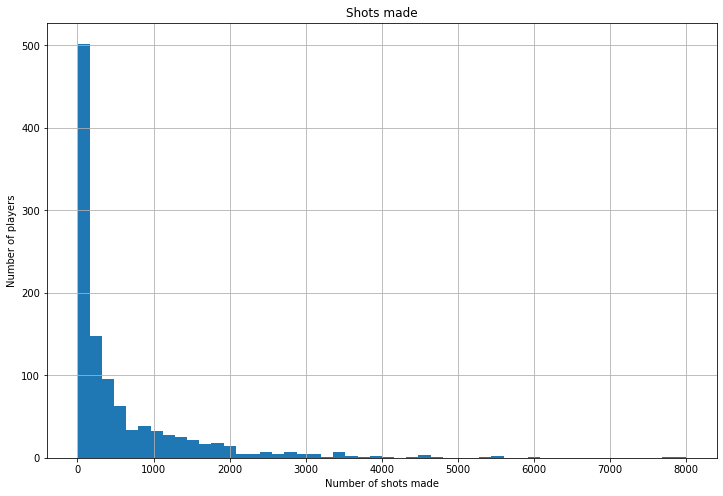

In [65]:
# We'll use our Series from DE3
ax = player_shots_took.plot(kind='hist', bins=50, figsize=(12, 8), title='Shots made', grid=True)
ax.set_xlabel('Number of shots made')
ax.set_ylabel('Number of players');

**P2:** Make a scatterplot the number of free throws *taken* to the number of free throws *made*. Give the graph a nice title, and label the x and y axes. Make the figsize 12 by 8 and include a grid.

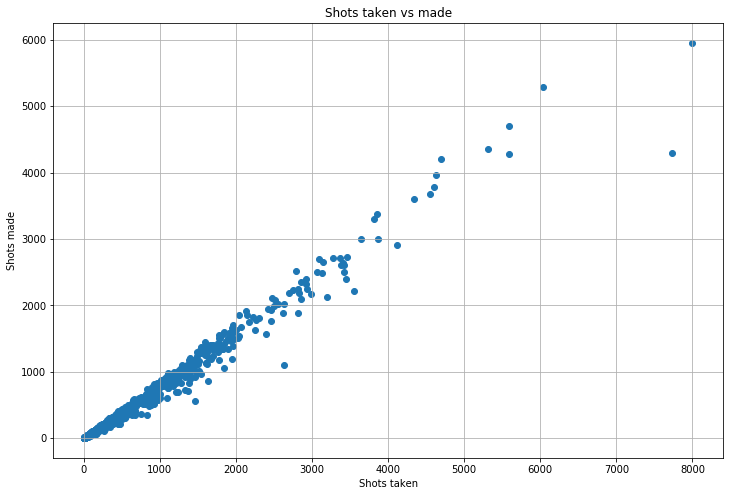

In [78]:
fig = plt.figure(figsize=(12, 8))
plt.scatter(player_shots_took, player_shots_made)
plt.grid(True)
plt.title('Shots taken vs made')
plt.xlabel('Shots taken')
plt.ylabel('Shots made');

### Bonus questions

**B1:** List the top five players in terms of highest *percentage* of free throws *made*. Only include players who took at least 50 free throws.

In [66]:
# We'll filter out players who took less than 50 shots
player_shots_took = player_shots_took[player_shots_took > 50]

# Then we'll divide these two to get a percentage.  If you Google how to divide Pandas series you'll see the function .divide(), which we'll use
player_pct = player_shots_made.divide(player_shots_took)

# If you Google how to get the largest values in a Pandas series you'll see the function nlargest, which we'll use
player_pct.nlargest(5)

player
Steve Nash          0.913891
Brian Roberts       0.910979
Mario Hezonja       0.907407
Ray Allen           0.903178
Chauncey Billups    0.901540
dtype: float64

**B2:** Make a line chart (`my_df.plot(..., kind='line')`) with the x-axis being the year and the y-axis being the percentage of free throws made. The years should go in increasing order. So 2006 first, then 2007, etc. Do the same things (title, axes labels, etc.) as the plotting problems above.

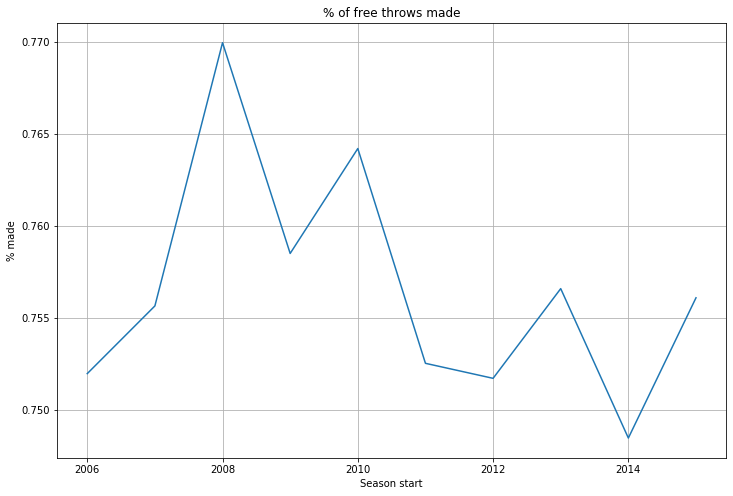

In [92]:
# We need to group by year. We want to add up the shot_made, and count how many shots were taken. To apply two
# different functions to two different columns for a groupby, you could Google "Pandas groupby different functions to different columns".
# If you did this you would see this link: https://stackoverflow.com/questions/14529838/apply-multiple-functions-to-multiple-groupby-columns
# They show that you can use the .agg (for aggregate) function and supply a dictionary showing what to do to what column.
year_df = df.groupby('season_start').agg({'player': 'count', 'shot_made': 'sum'})

# Then we'll divide to make a new percentage column
year_df['pct_made'] = year_df['shot_made'] / year_df['player']

# Finally we'll plot this. If you experiment a bit you'll see that just using .plot() on the column is the easiest way.
ax = year_df['pct_made'].plot(title='% of free throws made', grid=True, figsize=(12, 8))
ax.set_xlabel('Season start')
ax.set_ylabel('% made');